# Tesis

Este es el cuaderno de Jupyter para la implementación de la tesis. <br >
Este código utiliza el trabajo realizado por Diego Gomez (Poner aquí link al artículo de el, o el github o lo que sea) y lo aplica al problema de la regulación del nivel de glucosa en la sangre en pacientes Diabéticos Tipo 1. <br >
Se utiliza la librería de "simglucose" que permite simular la dinámica de la glucosa, de acuerdo con el simulador aprobado por la FDA de UVa/Padova (Versión 2008). <br >
Link de la librería de simglucose: https://github.com/jxx123/simglucose <br >
Link del GitHub de Diego: https://github.com/tarod13 <br >

# Tareas
1. Entender bien la librería de simglucose: rewards, acciones, estados, todo eso. (En progreso: ~5%) 
2. Hacer lo del mapeo de estados a acciones: s->a (Sin comenzar: 0%)
3. Hacer lo del mapeo de estados a Habilidades: s->A (Sin comenzar: 0%)
4. Implementar lo de Diego para encontrar los conceptos: s->S (Sin comenzar: 0%)
5. Analizar todo

In [1]:
import numpy as np
import simglucose
import gym
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
# Codigo tomado de: https://github.com/jxx123/simglucose

# Basal: Largo plazo
# Bolus: Corto plazo

# Register gym environment. By specifying kwargs,
# you are able to choose which patient to simulate.
# patient_name must be 'adolescent#001' to 'adolescent#010',
# or 'adult#001' to 'adult#010', or 'child#001' to 'child#010'
from gym.envs.registration import register
register(
    id='simglucose-adolescent2-v0',
    entry_point='simglucose.envs:T1DSimEnv',
    kwargs={'patient_name': 'adolescent#002'}
)

Observation(CGM=153.25191299887345)


/home/hero/gym/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))
/home/hero/gym/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))
/home/hero/gym/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))
/home/hero/gym/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))
/home/hero/gym/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))
/home/hero/gym/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args

Episode finished after 19 timesteps


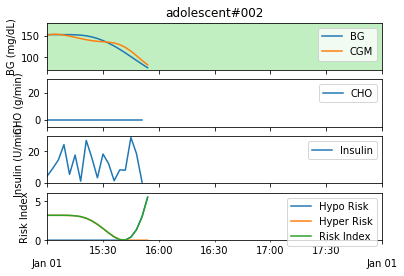

In [10]:
env = gym.make('simglucose-adolescent2-v0')

observation = env.reset()
print(observation)
for t in range(100):
    env.render(mode='human')
    # Action in the gym environment is a scalar
    # representing the basal insulin, which differs from
    # the regular controller action outside the gym
    # environment (a tuple (basal, bolus)).
    # In the perfect situation, the agent should be able
    # to control the glucose only through basal instead
    # of asking patient to take bolus
    action = env.action_space.sample()
    observation, reward, done, info = env.step(action)
    
    if done:
        print("Episode finished after {} timesteps".format(t + 1))
        break

In [11]:
from simglucose.simulation.env import T1DSimEnv
from simglucose.controller.basal_bolus_ctrller import BBController
from simglucose.sensor.cgm import CGMSensor
from simglucose.actuator.pump import InsulinPump
from simglucose.patient.t1dpatient import T1DPatient
from simglucose.simulation.scenario_gen import RandomScenario
from simglucose.simulation.scenario import CustomScenario
from simglucose.simulation.sim_engine import SimObj, sim, batch_sim
from datetime import timedelta
from datetime import datetime

# specify start_time as the beginning of today
now = datetime.now()
start_time = datetime.combine(now.date(), datetime.min.time())

# --------- Create Random Scenario --------------
# Specify results saving path
path = './results'

# Create a simulation environment
patient = T1DPatient.withName('adolescent#001')
sensor = CGMSensor.withName('Dexcom', seed=1)
pump = InsulinPump.withName('Insulet')
scenario = RandomScenario(start_time=start_time, seed=1)
env = T1DSimEnv(patient, sensor, pump, scenario)

# Create a controller
controller = BBController()

# Put them together to create a simulation object
s1 = SimObj(env, controller, timedelta(days=1), animate=False, path=path)
results1 = sim(s1)
print(results1)

# --------- Create Custom Scenario --------------
# Create a simulation environment
patient = T1DPatient.withName('adolescent#001')
sensor = CGMSensor.withName('Dexcom', seed=1)
pump = InsulinPump.withName('Insulet')
# custom scenario is a list of tuples (time, meal_size)
scen = [(7, 45), (12, 70), (16, 15), (18, 80), (23, 10)]
scenario = CustomScenario(start_time=start_time, scenario=scen)
env = T1DSimEnv(patient, sensor, pump, scenario)

# Create a controller
controller = BBController()

# Put them together to create a simulation object
s2 = SimObj(env, controller, timedelta(days=1), animate=False, path=path)
results2 = sim(s2)
print(results2)


# --------- batch simulation --------------
# Re-initialize simulation objects
s1.reset()
s2.reset()

# create a list of SimObj, and call batch_sim
s = [s1, s2]
results = batch_sim(s, parallel=True)
print(results)

Process ID: 3218
Simulation starts ...
Simulation Completed!
                             BG         CGM  CHO   insulin  LBGI      HBGI  \
Time                                                                         
2020-02-07 00:00:00  149.020000  165.793949  0.0  0.013933   0.0  2.755276   
2020-02-07 00:03:00  149.020000  161.582022  0.0  0.013933   0.0  2.755276   
2020-02-07 00:06:00  149.020000  159.239373  0.0  0.013933   0.0  2.755276   
2020-02-07 00:09:00  149.020000  157.472710  0.0  0.013933   0.0  2.755276   
2020-02-07 00:12:00  149.020000  156.108950  0.0  0.013933   0.0  2.755276   
...                         ...         ...  ...       ...   ...       ...   
2020-02-07 23:48:00  140.377422  140.872461  0.0  0.013933   0.0  1.706344   
2020-02-07 23:51:00  139.944000  139.740305  0.0  0.013933   0.0  1.658886   
2020-02-07 23:54:00  139.528133  138.839245  0.0  0.013933   0.0  1.613846   
2020-02-07 23:57:00  139.128508  138.273393  0.0  0.013933   0.0  1.571027   
202